In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel(r"C:\Users\susha\Downloads\iris (1).xls")

In [3]:
 data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data['SL']=data['SL'].fillna(data['SL'].mean())

In [8]:
data['SW']=data['SW'].fillna(data['SW'].mean())

In [9]:
data['PL']=data['PL'].fillna(data['PL'].mean())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [13]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [14]:
data.shape

(150, 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
data = data.dropna()

In [18]:
data.shape

(150, 5)

# STEP 2 - HANDLING OUTLIERS

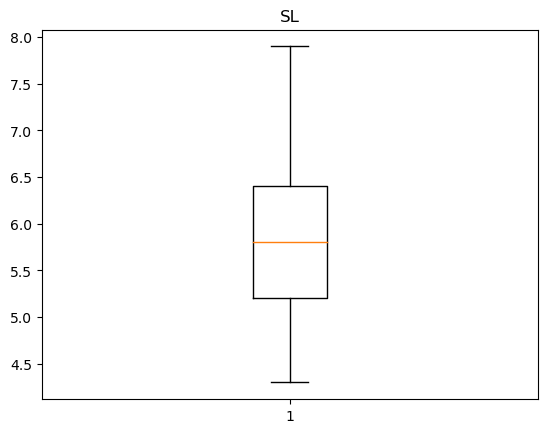

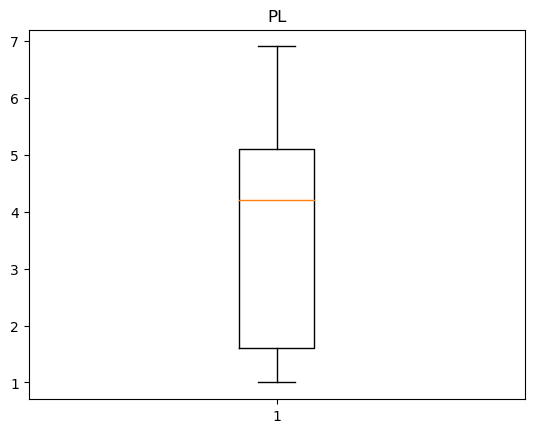

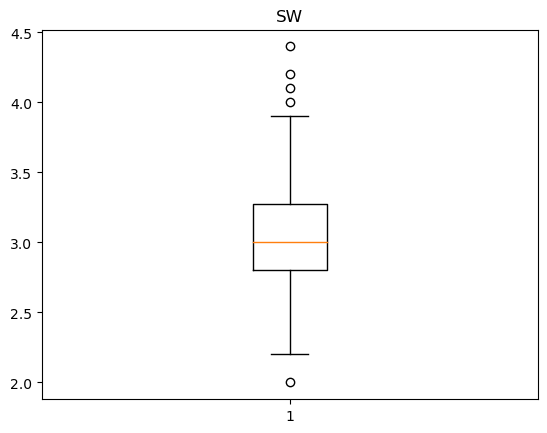

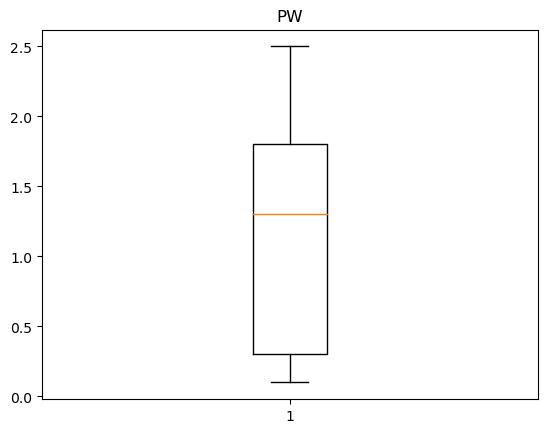

In [19]:
num_cols=["SL",'PL', 'SW','PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

There is Outlier in SW, so removing them

In [56]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

2.8 3.0 3.2


C:\Users\susha\AppData\Local\Temp\ipykernel_9396\4089797764.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\susha\AppData\Local\Temp\ipykernel_9396\4089797764.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\susha\AppData\Local\Temp\ipykernel_9396\4089797764.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [57]:
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['SW']=np.where(data['SW']>upper_whisker,upper_whisker,np.where(data['SW']<lower_whisker,lower_whisker,data['SW']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1d29b902d40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d29b903280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d29b902aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d29b9037c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d29b903a60>],
 'means': []}

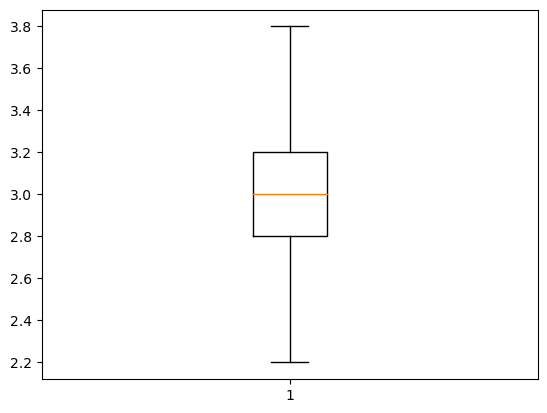

In [58]:
plt.boxplot(data['SW'])

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
scaler.fit(data.drop('Classification',axis=1))

StandardScaler()

In [63]:
scaled_features=scaler.transform(data.drop('Classification',axis=1))

In [64]:
data_features=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [66]:
data_features.head()

,SL,SW,PL,PW
0,-0.927268,1.188834,-1.377064,-1.336853
1,-1.169245,-0.055074,-1.377064,-1.336853
2,-1.532209,0.193708,-1.320049,-1.336853
3,-1.048257,1.437616,-1.377064,-1.336853
4,-0.564304,1.935179,-1.206019,-1.071910


In [67]:
# Training the model

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x=data_features
y=data['Classification']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [102]:
#Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.8,1.7,0.4,Iris-setosa


In [105]:
x=data[['SL','SW','PL','PW']]
y=data['Classification']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

In [107]:
logit_model=LogisticRegression()

In [108]:
logit_model.fit(x_train,y_train)

LogisticRegression()

In [109]:
y_pred_lr = logit_model.predict(x_test)

In [125]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, \
    accuracy_score

In [128]:
print ('Accuracy:', accuracy_score(y_test, y_pred_lr))
print( '\n clasification report:\n', classification_report(y_test,y_pred_lr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9318181818181818

 clasification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        44
      macro avg       0.94      0.93      0.94        44
   weighted avg       0.93      0.93      0.93        44


 confussion matrix:
 [[13  0  0]
 [ 0 13  2]
 [ 0  1 15]]


In [129]:
y_pred_lr

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn=KNeighborsClassifier(n_neighbors=1)

In [118]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [119]:
pred=knn.predict(x_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 14  1]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.96        44
   weighted avg       0.95      0.95      0.95        44



In [134]:
from sklearn.metrics import precision_score, \
    recall_score,  \
    accuracy_score

print ('Accuracy:', accuracy_score(y_test, pred))


Accuracy: 0.9545454545454546


In [122]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

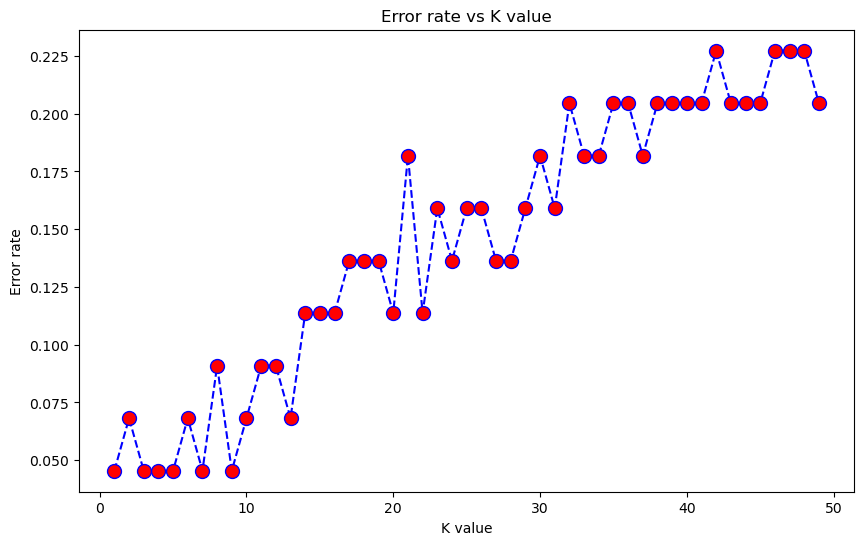

In [123]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title('Error rate vs K value')

plt.xlabel('K value')
plt.ylabel('Error rate')